

---


# Import Libraries and Data Exploration

**Library Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
import requests
from PIL import Image
from io import BytesIO

warnings.simplefilter(action='ignore')

**Dataset Loading**

In [ ]:
data = pd.read_csv('11_Pizza Sales Analysis.csv')

**Data Overview and Cleaning**

In [ ]:
print("Dataset Overview:")
print(data.describe())

Dataset Overview:
       order_details_id      order_id      quantity    unit_price  \
count      48620.000000  48620.000000  48620.000000  48620.000000   
mean       24310.500000  10701.479761      1.019622     16.494132   
std        14035.529381   6180.119770      0.143077      3.621789   
min            1.000000      1.000000      1.000000      9.750000   
25%        12155.750000   5337.000000      1.000000     12.750000   
50%        24310.500000  10682.500000      1.000000     16.500000   
75%        36465.250000  16100.000000      1.000000     20.250000   
max        48620.000000  21350.000000      4.000000     35.950000   

        total_price  
count  48620.000000  
mean      16.821474  
std        4.437398  
min        9.750000  
25%       12.750000  
50%       16.500000  
75%       20.500000  
max       83.000000  


**Duplicate Row Checking**

In [ ]:
print("\nDuplicated Rows:")
print(data[data.duplicated()])


Duplicated Rows:
Empty DataFrame
Columns: [order_details_id, order_id, pizza_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name]
Index: []


**Correlation Matrix**

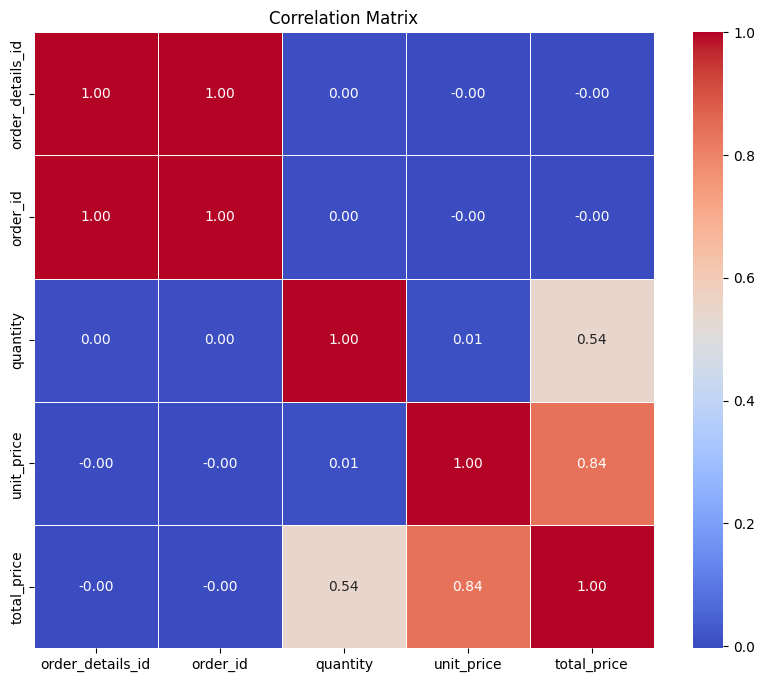

In [ ]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Data Exploration**

In [ ]:
print("First 5 rows of the dataset:")
print(data.head())

print("\nData Information:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nValue Counts of Pizza Categories:")
print(data['pizza_category'].value_counts())

First 5 rows of the dataset:
   order_details_id  order_id       pizza_id  quantity  order_date order_time  \
0                 1         1     hawaiian_m         1  01/01/2015   11:38:36   
1                 2         2  classic_dlx_m         1  01/01/2015   11:57:40   
2                 3         2  five_cheese_l         1  01/01/2015   11:57:40   
3                 4         2    ital_supr_l         1  01/01/2015   11:57:40   
4                 5         2     mexicana_m         1  01/01/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions



---


# Data Visualization

**Distribution of Total Price**

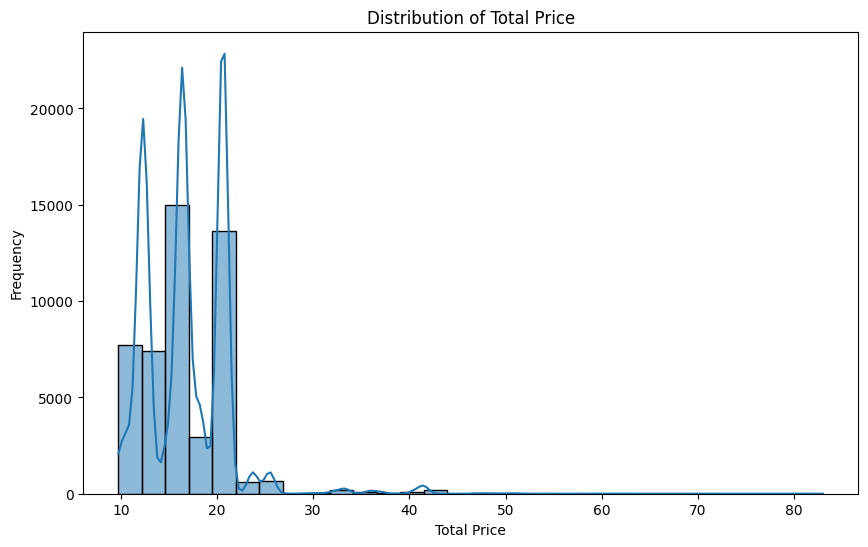

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

**Count of Pizza Sales**

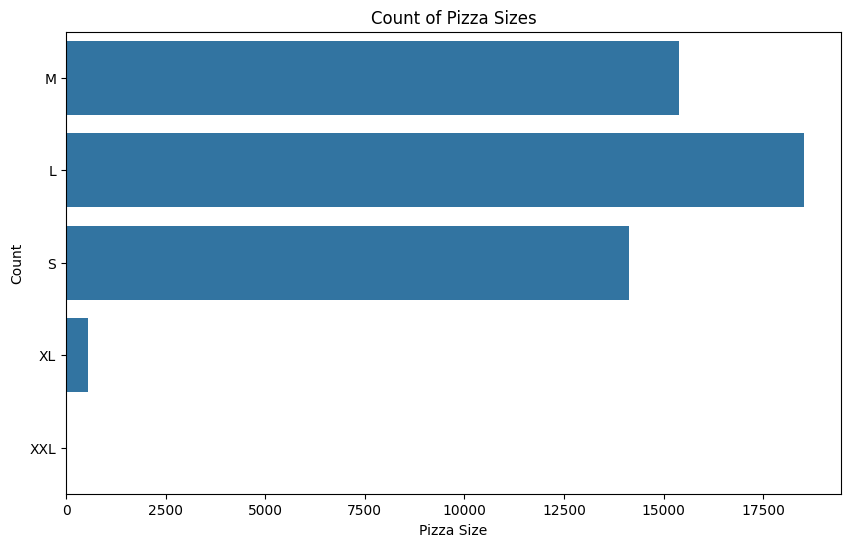

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data['pizza_size'])
plt.title('Count of Pizza Sizes')
plt.xlabel('Pizza Size')
plt.ylabel('Count')
plt.show()

**Monthly Sales Trend**

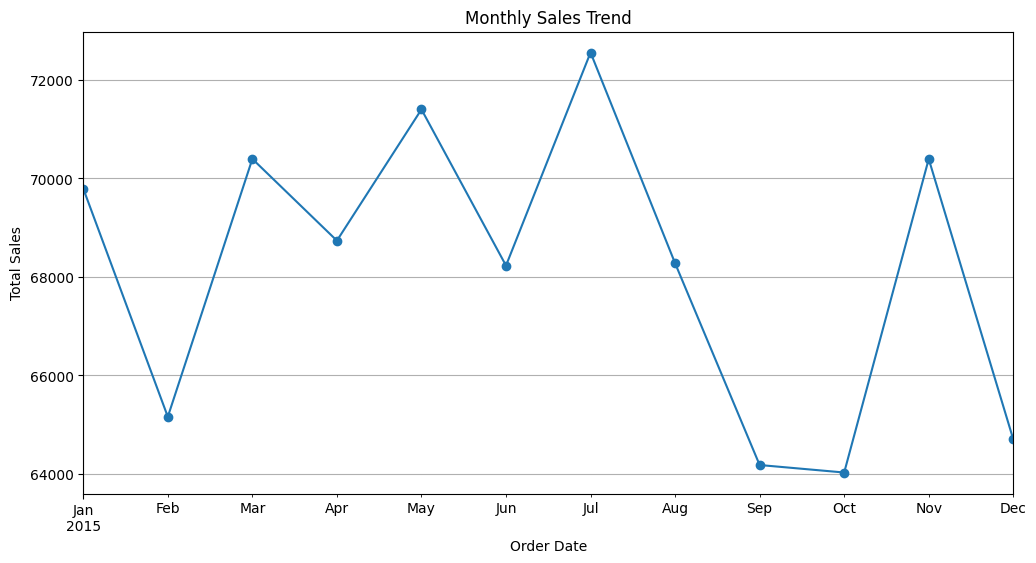

In [ ]:
data['order_date'] = pd.to_datetime(data['order_date'], format='%d/%m/%Y')

monthly_sales = data.resample('M', on='order_date')['total_price'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Top Pizza Ingredients**

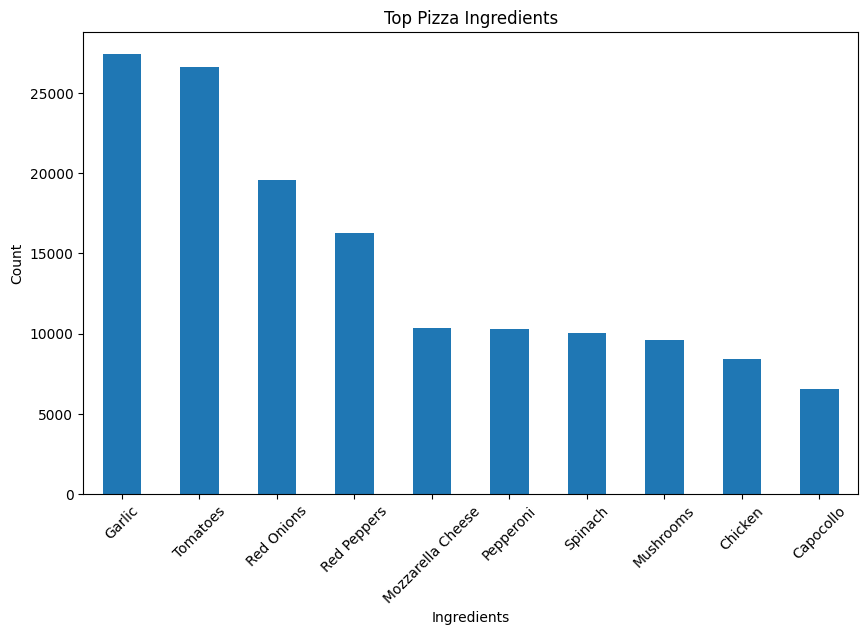

In [ ]:
top_ingredients = data['pizza_ingredients'].str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10, 6))
top_ingredients.plot(kind='bar')
plt.title('Top Pizza Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Customer Segmentation by Pizza Category**

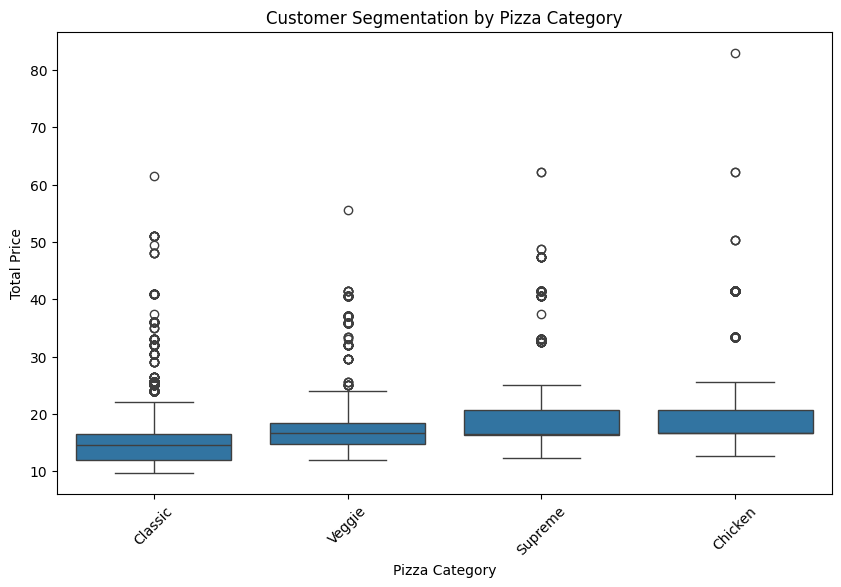

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pizza_category', y='total_price', data=data)
plt.title('Customer Segmentation by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()



---


# Linear Regression

**Data Preprocessing for Linear Regression**

In [ ]:
data_linear = data.dropna(subset=['total_price']).reset_index(drop=True)
le = LabelEncoder()
data_linear['pizza_size_encoded'] = le.fit_transform(data_linear['pizza_size'])

**Define Features and Target Variable**

In [ ]:
X_linear = data_linear['pizza_size_encoded'].values.reshape(-1, 1)
y_linear = data_linear['total_price'].values

**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_linear_scaled = scaler.fit_transform(X_linear)

**Train Linear Regression Model**

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_linear_scaled, y_linear)

print(f"Coefficients: {linear_model.coef_}")
print(f"Intercept: {linear_model.intercept_}")

Coefficients: [-2.71870526]
Intercept: 16.821473673385437


**Visualization of Linear Regression**

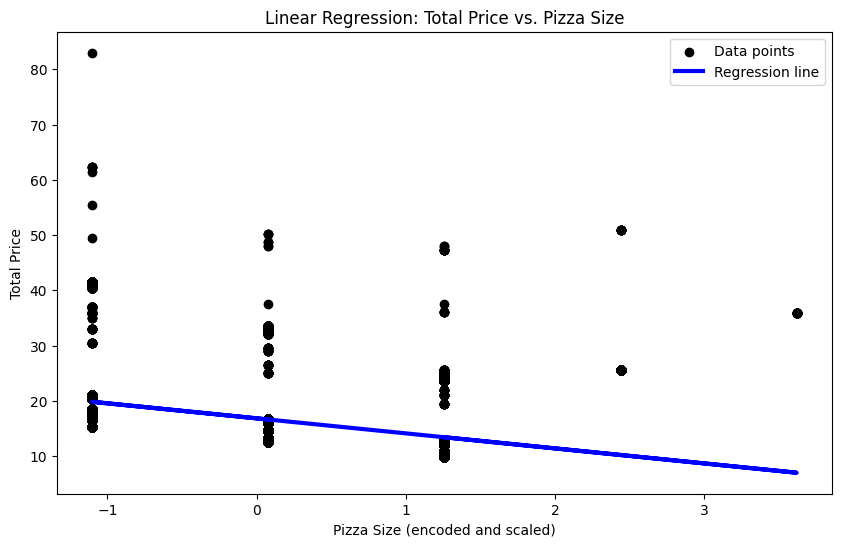

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_linear_scaled, y_linear, color='black', label='Data points')
plt.plot(X_linear_scaled, linear_model.predict(X_linear_scaled), color='blue', linewidth=3, label='Regression line')
plt.xlabel('Pizza Size (encoded and scaled)')
plt.ylabel('Total Price')
plt.title('Linear Regression: Total Price vs. Pizza Size')
plt.legend()
plt.show()

**Residual Plot for Linear Regression**

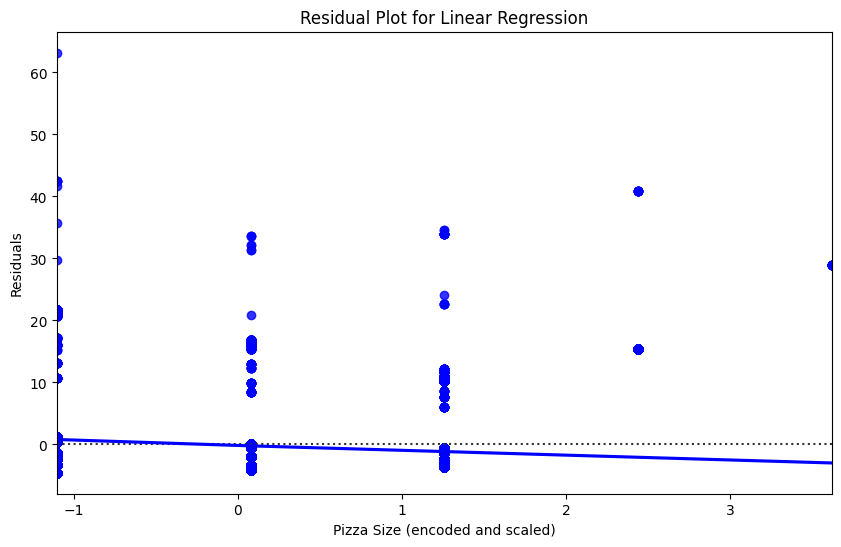

In [ ]:
residuals = y_linear - linear_model.predict(X_linear_scaled)
plt.figure(figsize=(10, 6))
sns.residplot(x=X_linear_scaled.flatten(), y=residuals, lowess=True, color='blue')
plt.xlabel('Pizza Size (encoded and scaled)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()



---


# Logistic Regression

**Data Preprocessing for Logistic Regression**

In [ ]:
data_logistic = data.dropna(subset=['pizza_ingredients']).reset_index(drop=True)
data_logistic['pizza_category_encoded'] = le.fit_transform(data_logistic['pizza_category'])

**One-Hot Encoding**

In [ ]:
ohe = OneHotEncoder(sparse=False)
ingredients_encoded = ohe.fit_transform(data_logistic['pizza_ingredients'].values.reshape(-1, 1))

**Define Features and Target Variable**

In [ ]:
X_logistic = ingredients_encoded
y_logistic = data_logistic['pizza_category_encoded'].values

**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

**Train Logistic Regression Model**

In [ ]:
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

**Predictions and Evaluation**

In [ ]:
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_test_pred))

Train Accuracy: 100.00%
Test Accuracy: 100.00%

Classification Report on Test Data:
              precision    recall  f1-score   support

     Chicken       1.00      1.00      1.00      2155
     Classic       1.00      1.00      1.00      2935
     Supreme       1.00      1.00      1.00      2357
      Veggie       1.00      1.00      1.00      2277

    accuracy                           1.00      9724
   macro avg       1.00      1.00      1.00      9724
weighted avg       1.00      1.00      1.00      9724


Confusion Matrix on Test Data:
[[2155    0    0    0]
 [   0 2935    0    0]
 [   0    0 2357    0]
 [   0    0    0 2277]]


**Confusion Matrix Visualization**

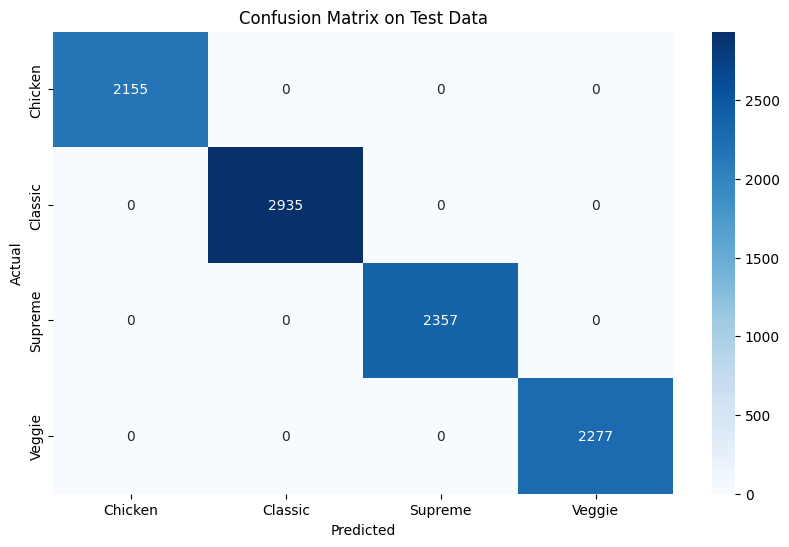

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**ROC Curve and AUC on Test Data**

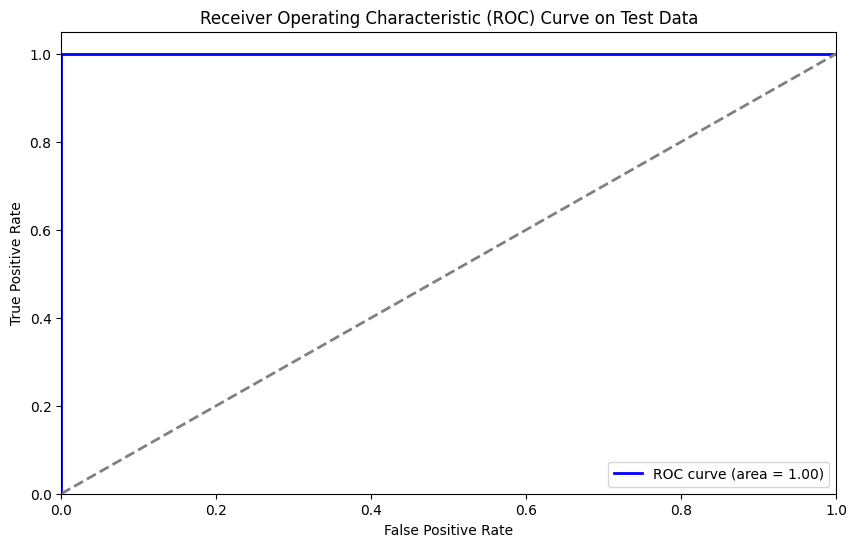

In [ ]:
y_test_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test Data')
plt.legend(loc='lower right')
plt.show()

**Cross-Validation for Model Evaluation**

In [ ]:
cv_scores = cross_val_score(logistic_model, X_logistic, y_logistic, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 100.00%




---


# Additional Data Visualizations

**Distribution of Pizza Categories**

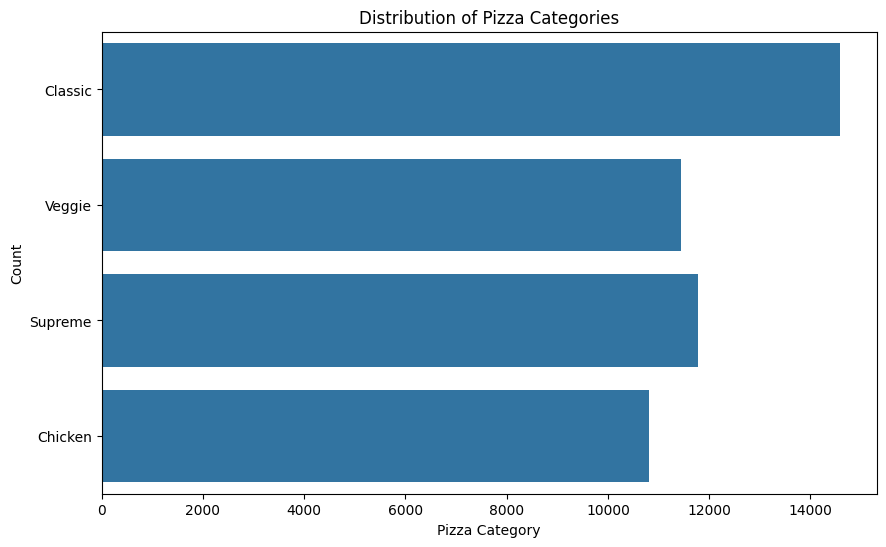

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data['pizza_category'])
plt.title('Distribution of Pizza Categories')
plt.xlabel('Pizza Category')
plt.ylabel('Count')
plt.show()

**Distribution of Pizza Ingredients**

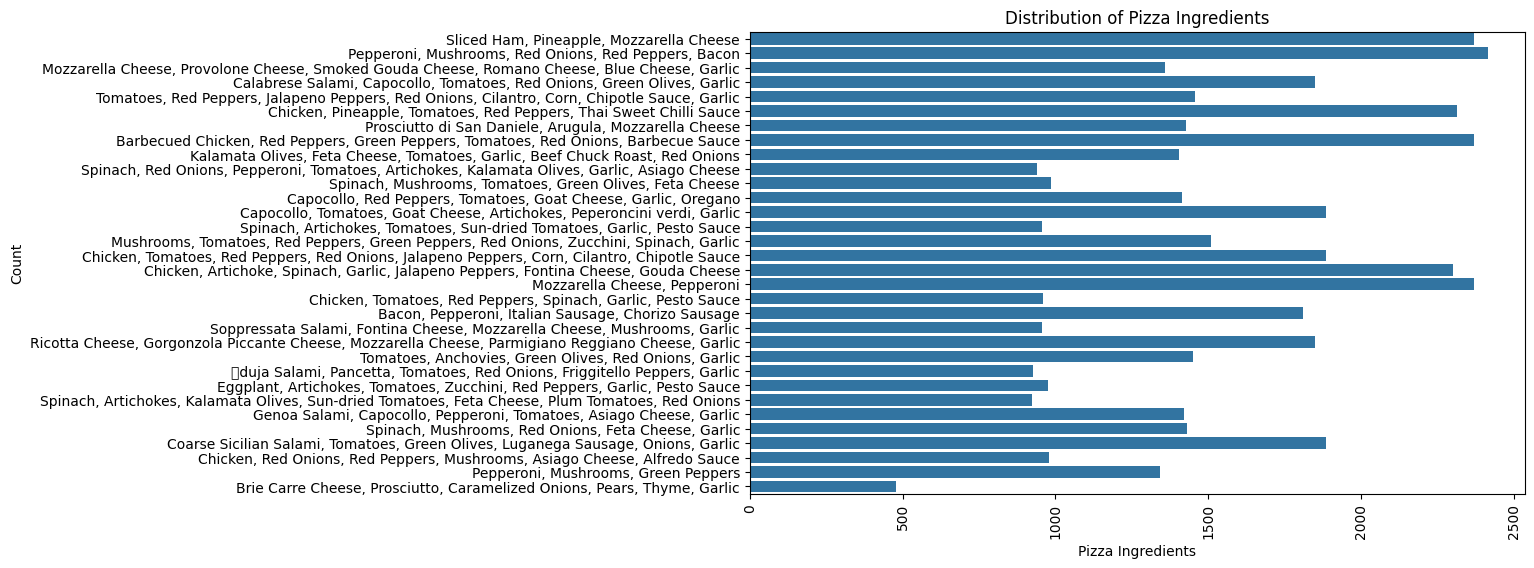

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data['pizza_ingredients'])
plt.title('Distribution of Pizza Ingredients')
plt.xlabel('Pizza Ingredients')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()